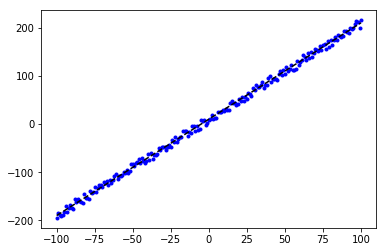

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num     = 201
std     = 20
a       = 2 
b       = 10

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-100,100,num)
y1      = a * x + nn * std + b 
y2      = a * x + b

plt.plot(x, y1, 'b.', x, y2, 'k--')
plt.show()

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 
# y = f(x) = a * x + b